# **Bank Customer Churn Prediction**

---
In this project, we aimed to accomplish :

1. Identify and visualize which factors contribute to customer churn
2. Build prediction model to classify if a customer is going to churn or not



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Churn_Modelling.csv')

In [ ]:
df.shape

(10000, 14)

In [ ]:
#check null or missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
#drop RowNumber, CustomerId, and Surname
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# **Exploratory Data Analysis**

---

Here the main interest is to get an understanding as to how the given attributes relate too the 'Exit' status

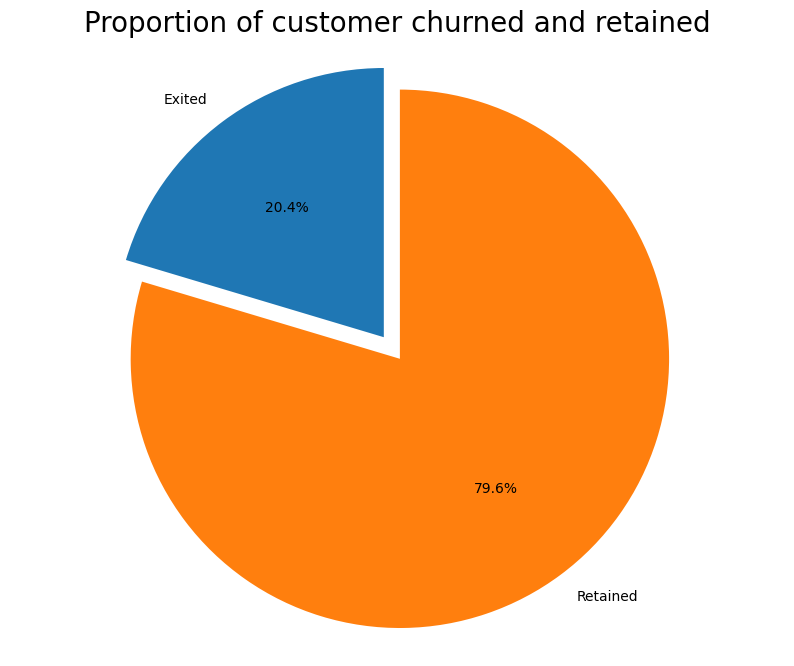

In [ ]:
labels = 'Exited', 'Retained'
sized = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(sized, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

Approximately 20% of the customer base has experienced churn. A potential baseline model could involve predicting that 20% of customers will undergo churn. Due to the relatively small percentage, it is crucial to select a model that can accurately predict this 20%. The bank's interest lies in identifying and retaining this particular group rather than focusing solely on accurately predicting the customers who will be retained.

<Axes: xlabel='IsActiveMember', ylabel='count'>

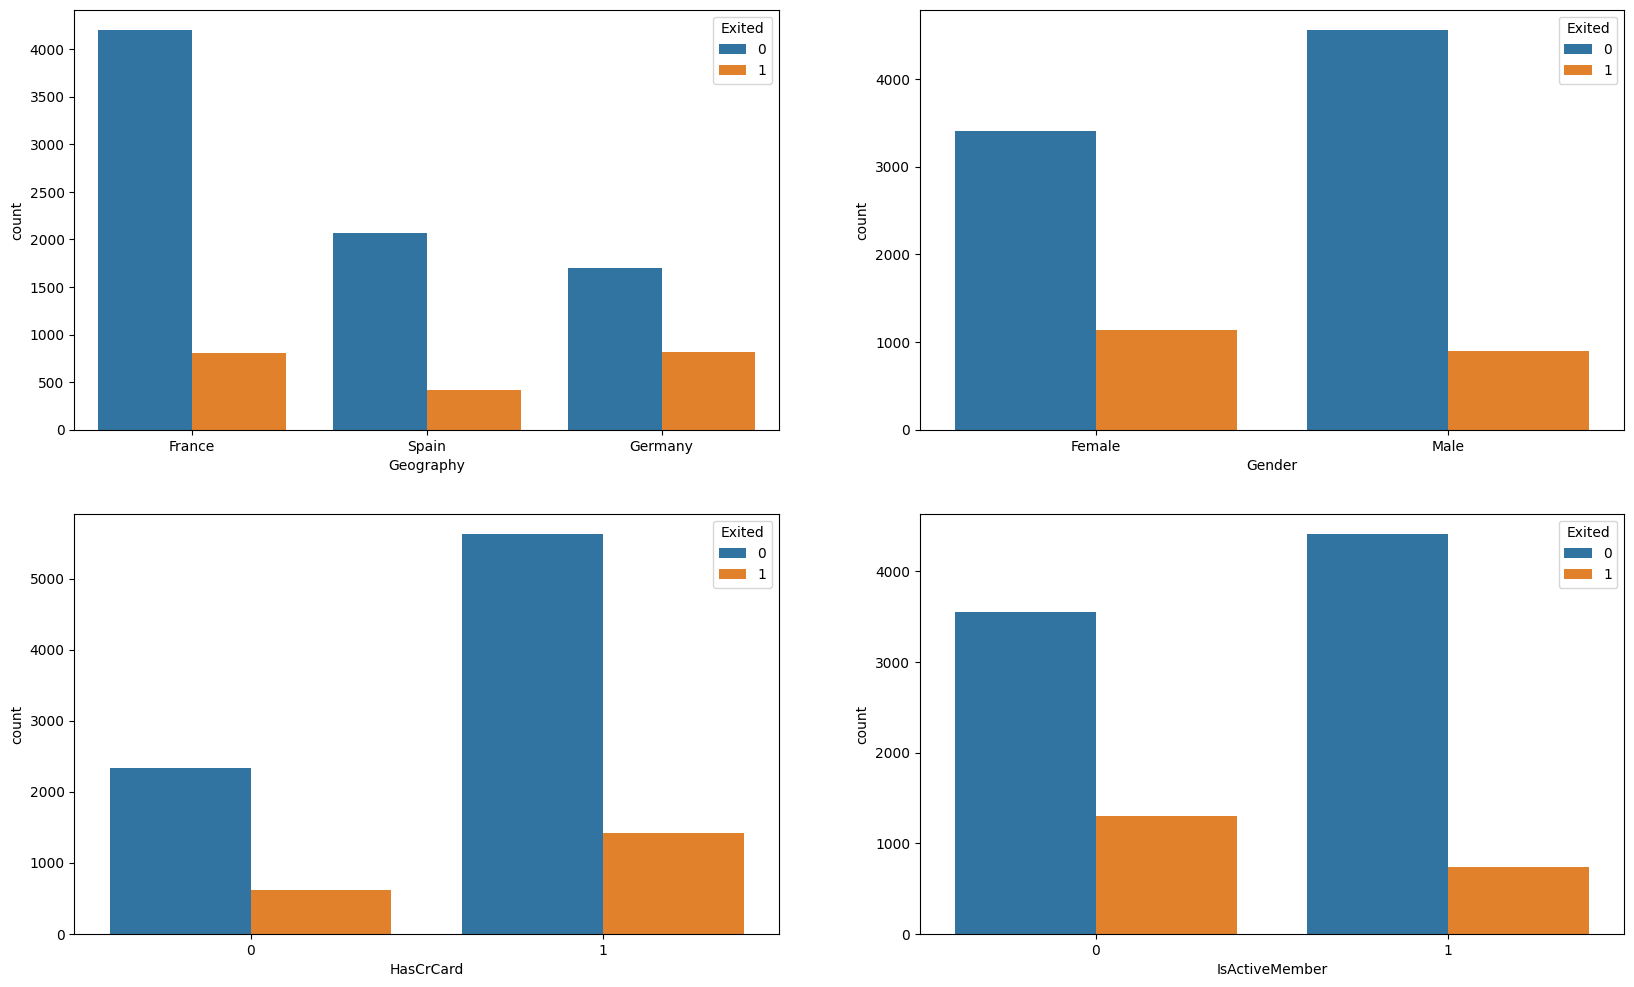

In [ ]:
#Review the status relation with categorical variables

fig, axarr = plt.subplots(2,2, figsize=(20,12))
sns.countplot(x='Geography', hue='Exited', data=df, ax=axarr[0][0])
sns.countplot(x='Gender', hue='Exited', data=df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=axarr[1][1])

We observe the following patterns:


*   The dataset predominantly consists of individuals from France. However, the correlation between the proportion of churned customers and the overall customer population suggests a potential issue for the bank, possibly indicating a deficiency in customer service resources, particularly in regions with fewer clients.
*   The rate of churn among female customers surpasses that of male customers.
*   Interestingly, a significant number of customers who churned possessed credit cards. While it could be tempting to perceive this as more than a mere coincidence, it's essential to consider that a substantial portion of the overall customer base also holds credit cards.
*   Notably, inactive members exhibit a higher churn rate. Concerningly, the prevalence of inactive members is notably high, implying a need for the bank to implement a program aimed at reactivating this group. Such an initiative would likely yield positive results in mitigating customer churn.

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

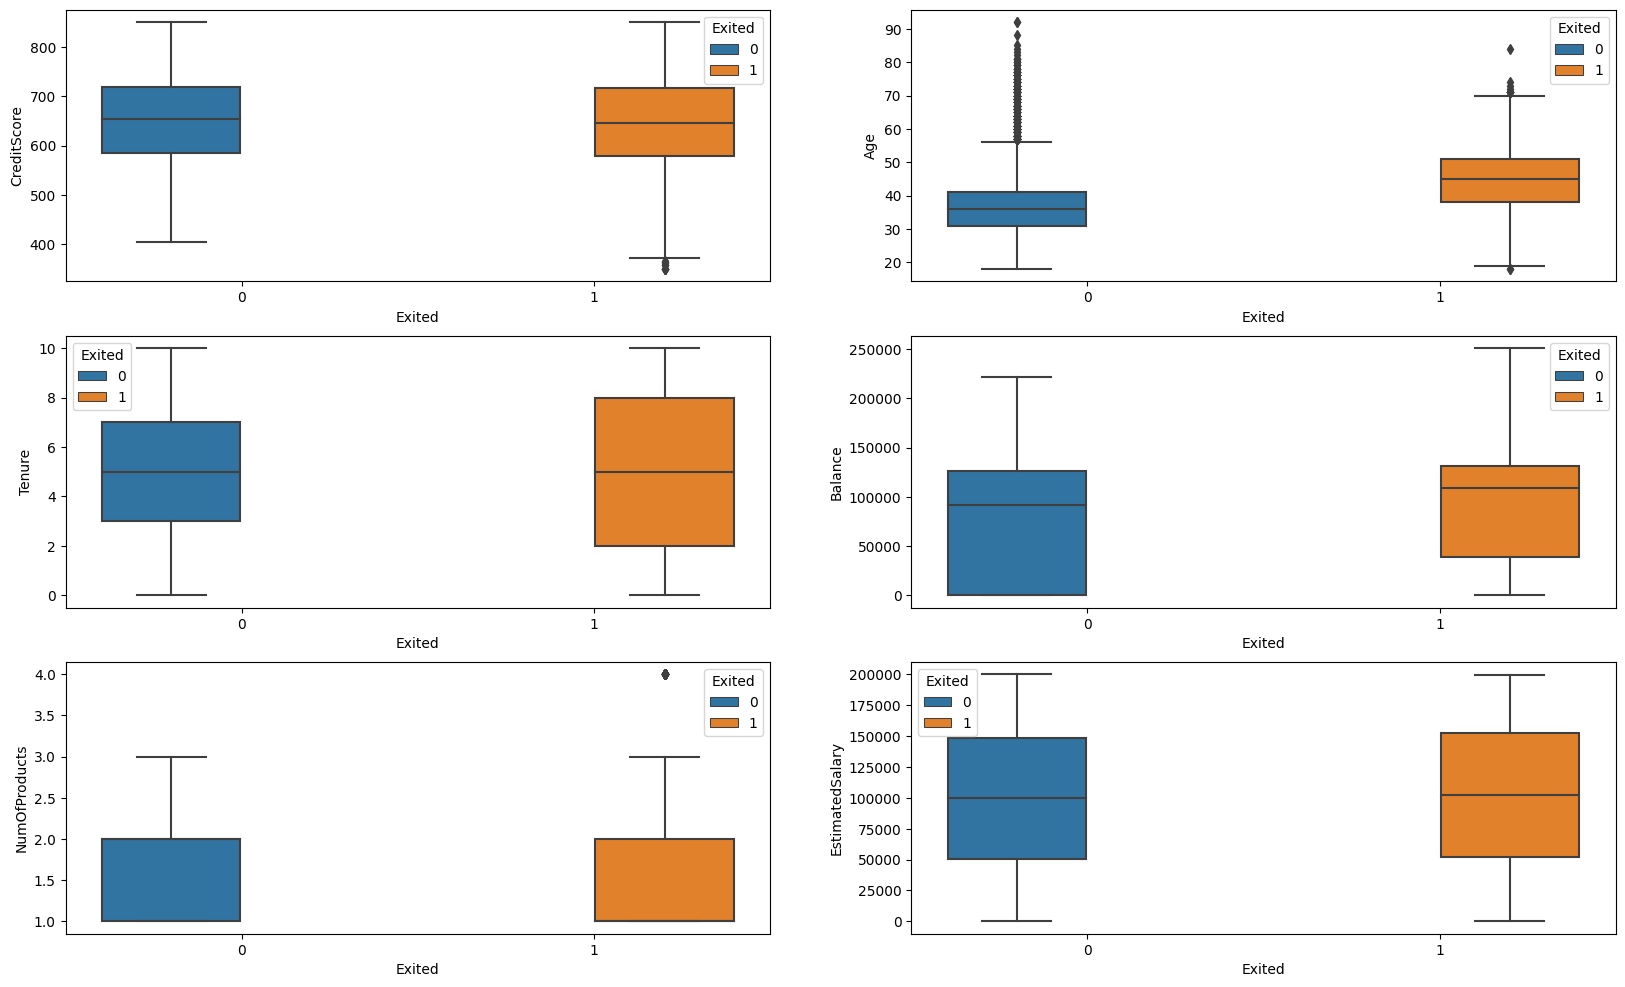

In [ ]:
# Relations based on continuous data attributes

fig, axarr = plt.subplots(3,2,figsize=(20,12))
sns.boxplot(y='CreditScore', x='Exited', hue='Exited', data=df, ax=axarr[0][0])
sns.boxplot(y='Age', x='Exited', hue='Exited', data=df, ax=axarr[0][1])
sns.boxplot(y='Tenure', x='Exited', hue='Exited', data=df, ax=axarr[1][0])
sns.boxplot(y='Balance', x='Exited', hue='Exited', data=df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts', x='Exited', hue='Exited', data=df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary', x='Exited', hue='Exited', data=df, ax=axarr[2][1])

We observe the following patterns:



*   There exists no substantial difference in the distribution of credit scores between retained and churned customers.
*   Older customers exhibit a higher likelihood of churning compared to their younger counterparts, suggesting a potential difference in service preferences across age categories. This observation prompts a need for the bank to reassess its target market or refine its retention strategy for various age groups.
*   Regarding tenure, customers at the extremes (those who have spent minimal time or an extensive period with the bank) are more prone to churn compared to those with an average tenure. This highlights the importance of addressing retention strategies for customers with extreme tenure durations.
*   Alarmingly, the bank is experiencing the loss of customers with substantial bank balances, which could adversely impact the available capital for lending.
*   Neither the product nor the salary demonstrates a significant effect on the likelihood of churning, suggesting that these factors do not play a decisive role in customer churn.

# **Feature Engineering**

---

In our quest to enhance the model's predictive capabilities for customer churn, we aim to incorporate features that are likely to influence the probability of churning. As a preliminary step, we begin by partitioning the dataset into training and testing sets.

In [ ]:
# Split train and test data

df_train = df.sample(frac=0.8, random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


(-1.0, 5.0)

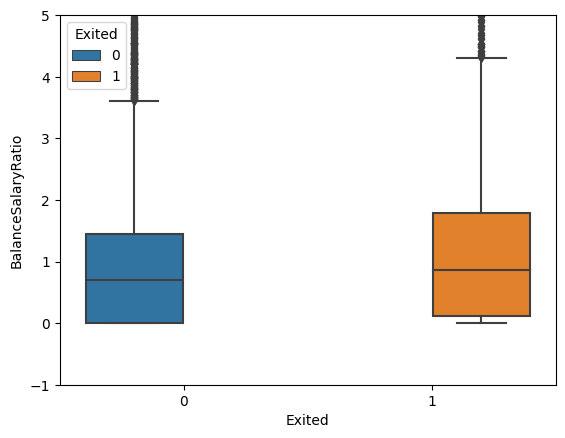

In [ ]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio', x='Exited', hue='Exited', data=df_train)
plt.ylim(-1,5)

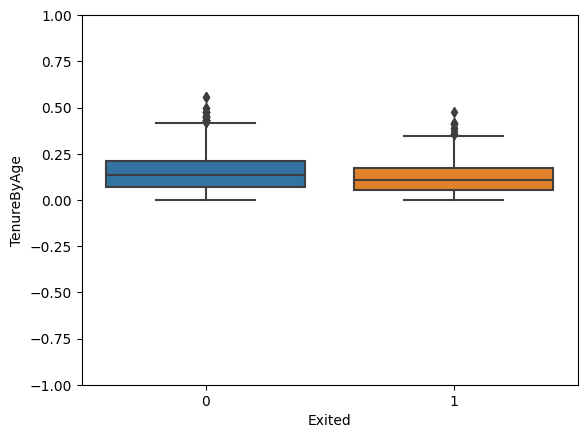

In [ ]:
#Given that tenure is a function of age, so created a variable aiming to standardize tenure over age:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge', x='Exited', data=df_train)
plt.ylim(-1,1)
plt.show()

In [ ]:
#variable to caputure credit score given age to take into account credit behavior
df_train['CreditScoreGivenAge'] = df_train.CreditScore / (df_train.Age)

In [ ]:
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


# **Data Prep for Model Fitting**

In [ ]:
# Arrange columns by data type for easier manipulation
continuous_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio', 'TenureByAge', 'CreditScoreGivenAge']
categorical_features = ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender']
df_train = df_train[['Exited'] + continuous_features + categorical_features]
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male


In [ ]:
# one-hot encoding for feature hascrcard and isactivemember
# apply 1 and -1 one hot encoding

df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,France,Male


In [ ]:
#one-hot encoding for categorical variables
cat_list = ['Geography', 'Gender']
remove = list()
for i in cat_list:
  if(df_train[i].dtype == np.str or df_train[i].dtype == np.object):
    for j in df_train[i].unique():
      df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
      remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()

<ipython-input-19-ab276338fa73>:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if(df_train[i].dtype == np.str or df_train[i].dtype == np.object):
<ipython-input-19-ab276338fa73>:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if(df_train[i].dtype == np.str or df_train[i].dtype == np.object):
<ipython-input-19-ab276338fa73>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,1,-1,-1,1,-1
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,-1,1,-1,1,-1
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,-1,1,-1,1,-1
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,-1,-1,1,-1,1
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,-1,1,-1,-1,1


In [ ]:
#MinMax Scalling the continuous variables

minVec = df_train[continuous_features].min().copy()
maxVec = df_train[continuous_features].max().copy()

df_train[continuous_features] = (df_train[continuous_features]-minVec)/(maxVec-minVec)
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,1,-1,-1,1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,-1,1,-1,1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,-1,1,-1,1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,-1,-1,1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,-1,1,-1,-1,1


In [ ]:
# data prep pipiline fot test data

def DfPrepPipeline(df_predict, df_train_Cols, minVec, maxVec):
  # add new features
  df_predict['BalanceSalaryRatio'] = df_predict.Balance/df_predict.EstimatedSalary
  df_predict['TenureByAge'] = df_predict.Tenure / (df_predict.Age - 18)
  df_predict['CreditScoreGivenAge'] = df_predict.CreditScore / (df_predict.Age - 18)

  #Reorder columns
  continuous_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio', 'TenureByAge', 'CreditScoreGivenAge']
  categorical_features = ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender']
  df_predict = df_predict[['Exited'] + continuous_features + categorical_features]

  #change 0 categorical features to -1
  df_predict.loc[df_predict.HasCrCard == 0, 'HasCrCard'] = -1
  df_predict.loc[df_predict.IsActiveMember == 0, 'IsActiveMember'] = -1

  #One-hot encoding categorical features
  cat_list = ['Geography', 'Gender']
  remove = list()
  for i in cat_list:
    for j in df_predict[i].unique():
      df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
    remove.append(i)
  df_predict = df_predict.drop(remove, axis=1)

  #Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
  L = list(set(df_train_Cols) - set(df_predict.columns))
  for i in L:
    df_predict[str(l)] = -1

  #MinMax Scalling continuous features
  df_predict[continuous_features] = (df_predict[continuous_features]-minVec)/(maxVec-minVec)

  #Ensure that the variables are ordered in the same way as was ordered in the train set
  df_predict = df_predict[df_train_Cols]
  return df_predict

# **Model Fitting and Selection**

---


*   Logistic regression in primal space and with diff kernels
*   SVM in the primal and with diff kernels
*   Ensemble models




In [ ]:
#Support library

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

#Fit models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Scoring functions

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
#Function to give best model score and parameters

def best_model(model):
  print(model.best_score_)
  print(model.best_params_)
  print(model.best_estimator_)
def get_auc_scores(y_actual, method, method2):
  auc_score = roc_auc_score(y_actual, method);
  fpr_df, tpr_df, _ = roc_curve(y_actual, method2);
  return (auc_score, fpr_df, tpr_df)

In [ ]:
#Fit primal logistic regression

param_grid = {'C': [0.1,0.5,1,10,100], 'max_iter': [250], 'fit_intercept':[True], 'intercept_scaling':[1], 'penalty':['l2'], 'tol':[0.00001, 0.0001, 0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited)
best_model(log_primal_Grid)

0.8149999999999998
{'C': 100, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=100, max_iter=250, tol=1e-05)


In [ ]:
#Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True], 'intercept_scaling':[1], 'penalty': ['l2'], 'tol': [0.0001, 0.000001]}
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Exited'])
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(df_train_pol2, df_train.Exited)
best_model(log_pol2_Grid)

0.8553750000000001
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 1e-06}
LogisticRegression(C=50, max_iter=300, solver='liblinear', tol=1e-06)


In [ ]:
#Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,500], 'gamma':[0.1, 0.01, 0.001], 'probability':[True], 'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited)
best_model(SVM_grid)

0.8518747609662071
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=100, gamma=0.1, probability=True)


In [ ]:
#Fit SVM with polynomial kernal
param_grid = {'C':[0.5,1,10,50,100], 'gamma':[0.1, 0.01, 0.001], 'probability':[True], 'kernel':['poly'], 'degree':[2,3]}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited)
best_model(SVM_grid)

0.8544999485716948
{'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)


In [ ]:
#Fit Random Forest Classifier
param_grid = {'max_depth': [3,5,6,7,8], 'max_features': [2,4,6,7,8,9], 'n_estimators':[50,100], 'min_samples_split':[3,5,6,7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited)
best_model(RanFor_grid)

0.8626250000000001
{'max_depth': 8, 'max_features': 7, 'min_samples_split': 5, 'n_estimators': 50}
RandomForestClassifier(max_depth=8, max_features=7, min_samples_split=5,
                       n_estimators=50)


In [31]:
#Fit Extreme Gradient Boost classifier
param_grid = {'max_depth':[5,6,7,8], 'gamma':[0.01, 0.001, 0.0001], 'min_child_weight':[1,5,10], 'learning_rate':[0.05, 0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited)
best_model(xgb_grid)

0.8626250000000001
{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


**Fit Best Models**

In [33]:
#Fit primal logistic regression

log_primal = LogisticRegression(
                                C=100,
                                class_weight=None,
                                dual=False, fit_intercept=True,
                                intercept_scaling=1, max_iter=250,
                                multi_class='auto',
                                n_jobs=None,
                                penalty='l2',
                                random_state=None,
                                solver='lbfgs',
                                tol=1e-05,
                                verbose=0,
                                warm_start=False
                                )
log_primal.fit(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited)

LogisticRegression(C=100, max_iter=250, tol=1e-05)

In [34]:
#Fit logistic regression with polynomial 2 kernel
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Exited'])
log_pol2 = LogisticRegression(
                              C=50,
                              class_weight=None,
                              dual=False,
                              fit_intercept=True,
                              intercept_scaling=1,
                              max_iter=300,
                              multi_class='auto',
                              n_jobs=None,
                              penalty='l2',
                              random_state=None,
                              solver='liblinear',
                              tol=1e-06,
                              verbose=0,
                              warm_start=False
                              )
log_pol2.fit(df_train_pol2, df_train.Exited)

LogisticRegression(C=50, max_iter=300, solver='liblinear', tol=1e-06)

In [36]:
#Fit SVM with RBF kernel

SVM_RBF = SVC(
              C=100,
              cache_size=200,
              class_weight=None,
              coef0=0.0,
              decision_function_shape='ovr',
              degree=3,
              gamma=0.1,
              kernel='rbf',
              max_iter=-1,
              probability=True,
              random_state=None,
              shrinking=True,
              tol=0.001,
              verbose=False
              )
SVM_RBF.fit(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited)

SVC(C=100, gamma=0.1, probability=True)

In [37]:
#Fit SVM with polynomial kernel

SVM_POL = SVC(
              C=100,
              cache_size=200,
              class_weight=None,
              coef0=0.0,
              decision_function_shape='ovr',
              degree=2,
              gamma=0.1,
              kernel='poly',
              max_iter=-1,
              probability=True,
              random_state=None,
              shrinking=True,
              tol=0.001,
              verbose=False
              )
SVM_POL.fit(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited)

SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)

In [40]:
#Fit Random Forest Classifier

RF = RandomForestClassifier(
                            bootstrap=True,
                            class_weight=None,
                            criterion='gini',
                            max_depth=8,
                            max_features=7,
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0,
                            min_samples_leaf=1,
                            min_samples_split=5,
                            min_weight_fraction_leaf=0.0,
                            n_estimators=50,
                            n_jobs=None,
                            oob_score=False,
                            random_state=None,
                            verbose=0,
                            warm_start=False
                            )
RF.fit(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited)

RandomForestClassifier(max_depth=8, max_features=7, min_samples_split=5,
                       n_estimators=50)

In [48]:
#Fit extreme gradient boost classifier

{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 100}

XGB = XGBClassifier(
                    base_score=0.5,
                    booster='gbtree',
                    colsample_bylevel=1,
                    colsample_bytree=1,
                    gamma=0.01,
                    learning_rate=0.1,
                    max_delta_step=0,
                    max_depth=5,
                    min_child_weight=10,
                    missing=1,
                    n_estimators=100,
                    n_jobs=1,
                    nthread=None,
                    objective='binary:logistic',
                    random_state=0,
                    reg_alpha=0,
                    reg_lambda=1,
                    scale_pos_weight=1,
                    seed=None,
                    silent=True,
                    subsample=1
                    )
XGB.fit(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:33:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.01,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=5, max_leaves=None, min_child_weight=10, missing=1,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=1, nthread=None, num_parallel_tree=None, ...)

**Review best model fit accuracy**

Keen interest is on the performance in predicting 1's (Customer who churn)

In [42]:
print(classification_report(df_train.Exited, log_primal.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6353
           1       0.64      0.24      0.35      1647

    accuracy                           0.82      8000
   macro avg       0.73      0.60      0.62      8000
weighted avg       0.79      0.82      0.78      8000



In [43]:
print(classification_report(df_train.Exited,  log_pol2.predict(df_train_pol2)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6353
           1       0.76      0.48      0.59      1647

    accuracy                           0.86      8000
   macro avg       0.82      0.72      0.75      8000
weighted avg       0.85      0.86      0.85      8000



In [44]:
print(classification_report(df_train.Exited,  SVM_RBF.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6353
           1       0.85      0.40      0.54      1647

    accuracy                           0.86      8000
   macro avg       0.86      0.69      0.73      8000
weighted avg       0.86      0.86      0.84      8000



In [45]:
print(classification_report(df_train.Exited,  SVM_POL.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6353
           1       0.84      0.38      0.52      1647

    accuracy                           0.86      8000
   macro avg       0.85      0.68      0.72      8000
weighted avg       0.85      0.86      0.83      8000



In [46]:
print(classification_report(df_train.Exited,  RF.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6353
           1       0.88      0.52      0.65      1647

    accuracy                           0.89      8000
   macro avg       0.88      0.75      0.79      8000
weighted avg       0.89      0.89      0.87      8000



In [49]:
print(classification_report(df_train.Exited,  XGB.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6353
           1       0.83      0.55      0.66      1647

    accuracy                           0.88      8000
   macro avg       0.86      0.76      0.80      8000
weighted avg       0.88      0.88      0.88      8000



In [50]:
y = df_train.Exited
X = df_train.loc[:, df_train.columns != 'Exited']
X_pol2 = df_train_pol2
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y, log_pol2.predict(X_pol2),log_pol2.predict_proba(X_pol2)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, SVM_POL.predict(X),SVM_POL.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])

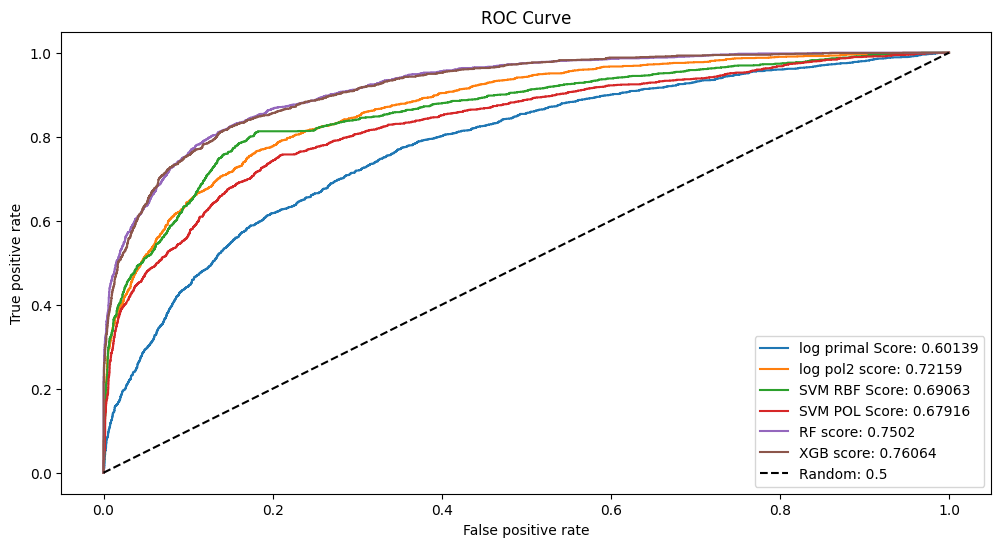

In [51]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

Based on the aforementioned outcomes, my primary objective is to anticipate customers who are likely to churn. Identifying these individuals is crucial for implementing targeted retention strategies. Therefore, I prioritize the recall measures on instances labeled as '1' over the overall accuracy score of the model.

Given that only 20% of the data represents instances of churn, achieving a recall higher than this baseline is already considered an enhancement. However, the goal is to maximize the recall while maintaining a high precision. This approach ensures that the bank allocates resources effectively toward clients identified by the model without expending excessive resources on false positives.

Upon reviewing the performance of the trained models, it is evident that the random forest model strikes a commendable balance between recall and precision. Specifically, based on the fit to the training set, the model exhibits a precision score of 0.88 for instances labeled as '1'. This implies that out of all customers predicted by the model to churn, 88% actually do churn. Additionally, the model achieves a recall score of 0.53 on instances labeled as '1', signifying its ability to identify 53% of all customers who eventually churned.

**Test model prediction accuracy**

In [52]:
#Transform test data
df_test = DfPrepPipeline(df_test, df_train.columns, minVec, maxVec)
df_test = df_test.mask(np.isinf(df_test))
df_test = df_test.dropna()
df_test.shape

<ipython-input-21-e66bfa0248d6>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
<ipython-input-21-e66bfa0248d6>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
<ipython-input-21-e66bfa0248d6>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

(1996, 17)

In [53]:
print(classification_report(df_test.Exited,  RF.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1607
           1       0.81      0.41      0.54       389

    accuracy                           0.87      1996
   macro avg       0.84      0.69      0.73      1996
weighted avg       0.86      0.87      0.85      1996



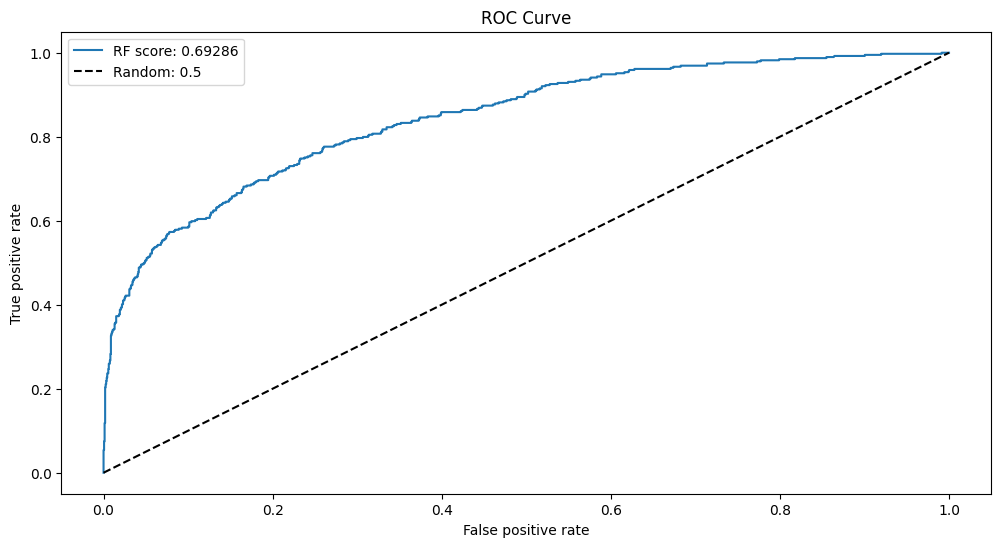

In [54]:
auc_RF_test, fpr_RF_test, tpr_RF_test = get_auc_scores(df_test.Exited, RF.predict(df_test.loc[:, df_test.columns != 'Exited']),
                                                       RF.predict_proba(df_test.loc[:, df_test.columns != 'Exited'])[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RF_test, tpr_RF_test, label = 'RF score: ' + str(round(auc_RF_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

# **Conclusion**

The precision of the model on previousy unseen test data is slightly higher with regard to predicting 1's i.e. those customers that churn. However, in as much as the model has a high accuracy, it still misses about half of those who end up churning. This could be imprved by providing retraining the model with more data over time while in the meantime working with the model to save the 41% that would have churned :-)